#Dataset load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#EDA

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

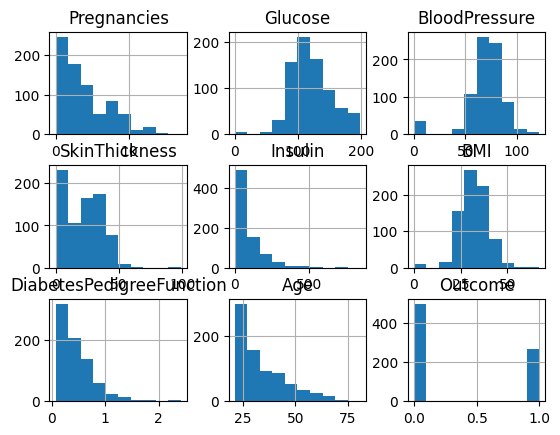

In [ ]:
df.hist()

In [ ]:
#the count of women without diabetes is much bigger than the women with diabetes.the dataset is small also therefore entropy will probably be better than gini criterion

<Axes: >

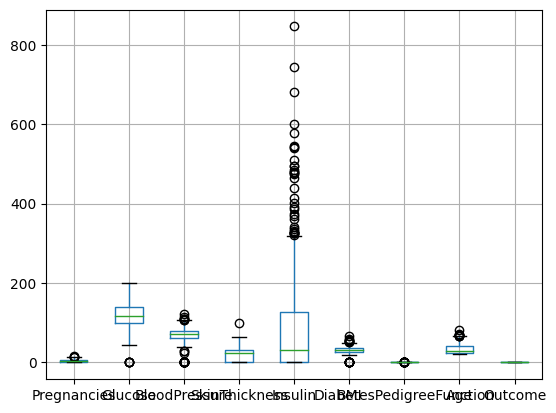

In [ ]:
df.boxplot()

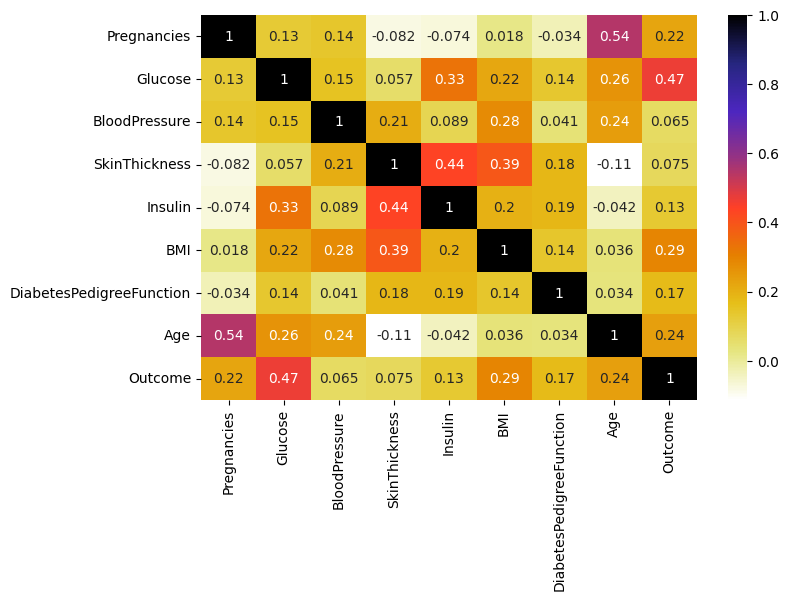

In [ ]:
cor = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

#Data preprocessing

In [ ]:
X=df.drop('Outcome',axis=1).values.astype(float)
print(X[1,:])

[ 1.    85.    66.    29.     0.    26.6    0.351 31.   ]


In [ ]:
y=df.iloc[:,-1].values
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler_X=StandardScaler()     #not required for RandomForest but can speed up the calculations
X_train=scaler_X.fit_transform(X_train)
X_test=scaler_X.transform(X_test)

In [ ]:
df.shape

(768, 9)

#Random Forest (all variables)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
#gini: less computational expense, classification problems with binary dependend variable will 'favor' the level with bigger count of observations
#entropy: requires more computations, leads to better generalization on unseen data

In [ ]:
#since the number of women without diabetes is much bigger than the ones with, and since our dataset is small we will prefer entropy (check boxplot in EDA)

In [ ]:
# max_features refers to the number of features to take,
#since deafault is sqrt(features) the Random Forest algorithm will consider the square root of the total number of features at each split. In this case, it will consider 2 features/nodes in each sample
#therefore feature selection could be more vital at Random Forest algorithms than it is for other models

In [ ]:
#let's try both criterions   (R libraries use gini only)
param_grid_rf = {'criterion':['gini','entropy'],
    'n_estimators': list(range(10, 200, 10)) + list(range(200, 2001, 100))
                  }

In [ ]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, refit=True, cv=5, verbose=3)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 76 candidates, totalling 380 fits
[CV 1/5] END ...criterion=gini, n_estimators=10;, score=0.740 total time=   0.0s
[CV 2/5] END ...criterion=gini, n_estimators=10;, score=0.821 total time=   0.0s
[CV 3/5] END ...criterion=gini, n_estimators=10;, score=0.732 total time=   0.0s
[CV 4/5] END ...criterion=gini, n_estimators=10;, score=0.732 total time=   0.0s
[CV 5/5] END ...criterion=gini, n_estimators=10;, score=0.762 total time=   0.0s
[CV 1/5] END ...criterion=gini, n_estimators=20;, score=0.724 total time=   0.1s
[CV 2/5] END ...criterion=gini, n_estimators=20;, score=0.813 total time=   0.1s
[CV 3/5] END ...criterion=gini, n_estimators=20;, score=0.707 total time=   0.1s
[CV 4/5] END ...criterion=gini, n_estimators=20;, score=0.724 total time=   0.1s
[CV 5/5] END ...criterion=gini, n_estimators=20;, score=0.795 total time=   0.1s
[CV 1/5] END ...criterion=gini, n_estimators=30;, score=0.748 total time=   0.1s
[CV 2/5] END ...criterion=gini, n_estimators=30

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 300, 400, 500,
                                          600, 700, 800, 900, 1000, 1100, 1200, ...]},
             verbose=3)

In [ ]:
grid_rf.best_score_   #cv accuracy on train

0.7850059976009597

In [ ]:
grid_rf.best_params_

{'criterion': 'entropy', 'n_estimators': 40}

In [ ]:
grid_rf.score(X_test,y_test)   #test accuracy with best params

0.7662337662337663

In [ ]:
grid_rf.cv_results_

{'mean_fit_time': array([0.03535972, 0.06575904, 0.09463878, 0.09749532, 0.09517822,
        0.11920266, 0.13283186, 0.14778042, 0.16650786, 0.18800421,
        0.20275378, 0.22277327, 0.24503865, 0.25945687, 0.4222167 ,
        0.34532027, 0.32546139, 0.34047127, 0.35980463, 0.37525592,
        0.71479115, 0.76084166, 0.91558061, 1.27983098, 1.28776164,
        1.64273148, 1.82898088, 2.01065931, 2.07325783, 2.37719779,
        2.65895872, 2.75851827, 2.94174595, 3.12098203, 3.43339357,
        3.45112538, 3.87743545, 3.85723467, 0.02058825, 0.04240131,
        0.06297479, 0.10045357, 0.15912395, 0.19105005, 0.17000189,
        0.1655807 , 0.17702565, 0.19820752, 0.21761518, 0.24017634,
        0.25565028, 0.28117518, 0.3015039 , 0.48958268, 0.33342214,
        0.36419039, 0.37110295, 0.40056429, 0.68965135, 0.8700882 ,
        0.97752447, 1.34458308, 1.35529056, 1.72970891, 1.94249134,
        2.12026839, 2.35814762, 2.59531555, 2.8265337 , 2.95323787,
        4.94316492, 3.5926712 ,

In [ ]:
#Note to self: All the scores in each fold are 'comparable,' so the split into 5 folds probably happens first (e.g., in the 2nd fold, everyone is close to 80%), and then each algorithm is trained for each hyperparameter and not the other way around.
#unlike hyperparameters like lambda in SVM, here a higher number of bootstraps (n_estimators) will almost always yield equal or better performance (at the cost of computational load). We're just looking for where this increase becomes 'negligible'.

In [ ]:
grid_rf.best_estimator_.feature_importances_ #feature importance when using 40 trees with 2 nodes

array([0.07800845, 0.24488032, 0.09140358, 0.06409598, 0.07622036,
       0.17434411, 0.12751633, 0.14353087])

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Glucose,BMI,Age,DPF seems to have the highest importance ,maybe we can exclude a few features later and redo the modeling

In [ ]:
top_results_indices = np.argsort(grid_rf.cv_results_['mean_test_score'])[::-1][:20]   #test_score=mean cross validation score

In [ ]:
top_results_params = [grid_rf.cv_results_['params'][i] for i in top_results_indices]
top_results_scores = [grid_rf.cv_results_['mean_test_score'][i] for i in top_results_indices]

for params, score in zip(top_results_params, top_results_scores):
    print(f"Params: {params}, Mean Test Score: {score:.4f}")

Params: {'criterion': 'entropy', 'n_estimators': 40}, Mean Test Score: 0.7850
Params: {'criterion': 'gini', 'n_estimators': 60}, Mean Test Score: 0.7818
Params: {'criterion': 'gini', 'n_estimators': 90}, Mean Test Score: 0.7818
Params: {'criterion': 'entropy', 'n_estimators': 50}, Mean Test Score: 0.7818
Params: {'criterion': 'gini', 'n_estimators': 50}, Mean Test Score: 0.7802
Params: {'criterion': 'gini', 'n_estimators': 600}, Mean Test Score: 0.7802
Params: {'criterion': 'entropy', 'n_estimators': 60}, Mean Test Score: 0.7801
Params: {'criterion': 'entropy', 'n_estimators': 70}, Mean Test Score: 0.7801
Params: {'criterion': 'entropy', 'n_estimators': 90}, Mean Test Score: 0.7801
Params: {'criterion': 'gini', 'n_estimators': 110}, Mean Test Score: 0.7786
Params: {'criterion': 'gini', 'n_estimators': 700}, Mean Test Score: 0.7785
Params: {'criterion': 'gini', 'n_estimators': 200}, Mean Test Score: 0.7785
Params: {'criterion': 'gini', 'n_estimators': 1100}, Mean Test Score: 0.7785
Para

In [ ]:
#best gini and best entropy seem to have similar performance
#let s check the accuracy on the test set

In [ ]:
rf_60=RandomForestClassifier(n_estimators=60,criterion='gini',random_state=42)  #test accuracy with best gini
rf_60.fit(X_train,y_train)
accuracy_score(y_test,rf_60.predict(X_test))

0.7142857142857143

In [ ]:
grid_rf.score(X_test,y_test)        #test accuracy wuith entropy

0.7662337662337663

In [ ]:
#seems all the best algorithms were achieved with quite a few trees
#let s investigate this a bit further

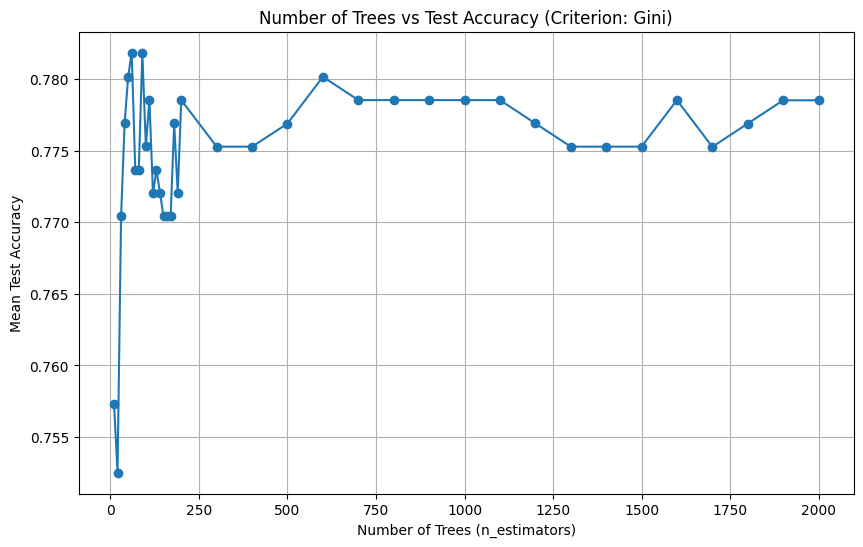

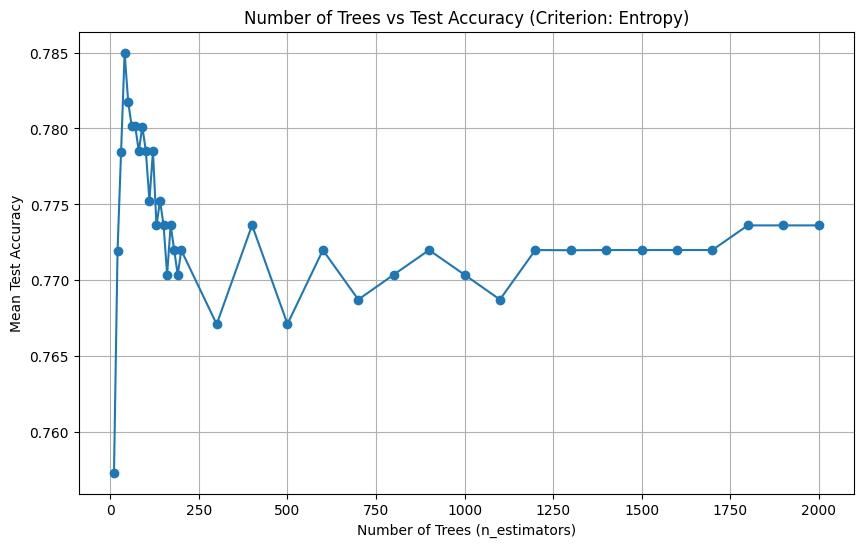

In [ ]:
#let s investigate
results = grid_rf.cv_results_

n_estimators = results['param_n_estimators'].data
mean_test_scores = results['mean_test_score']

n_estimators_gini = n_estimators[:int(len(n_estimators)/2)]
mean_test_scores_gini = mean_test_scores[:int(len(mean_test_scores)/2)]

n_estimators_entropy = n_estimators[int(len(n_estimators)/2):]
mean_test_scores_entropy = mean_test_scores[int(len(mean_test_scores)/2):]

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_gini, mean_test_scores_gini, marker='o', linestyle='-')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Test Accuracy')
plt.title('Number of Trees vs Test Accuracy (Criterion: Gini)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_entropy, mean_test_scores_entropy, marker='o', linestyle='-')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Test Accuracy')
plt.title('Number of Trees vs Test Accuracy (Criterion: Entropy)')
plt.grid(True)
plt.show()

In [ ]:
#the train accuracy graph is quite volatile for the first 200 trees probably due to the randomness of bootstrap samples
#therefore althought our best models where achieved for 60-80 trees they will probably not perform well on unseen data

In [ ]:
rf_90=RandomForestClassifier(n_estimators=90,random_state=42)   #RandomForestClassifier doesn't keep the accuracy score:S
rf_90.fit(X_train,y_train)
y_pred_train=rf_90.predict(X_train)
y_pred_test=rf_90.predict(X_test)
print(accuracy_score(y_train,y_pred_train))

1.0


In [ ]:
print(accuracy_score(y_test,y_pred_test))

0.7207792207792207


In [ ]:
cross_val_score(rf_90,X_train,y_train)

array([0.78861789, 0.80487805, 0.74796748, 0.75609756, 0.81147541])

In [ ]:
np.mean(cross_val_score(rf_90,X_train,y_train)) #same as grid.results

0.7818072770891644

In [ ]:
accuracy_score(y_train,y_pred_train) #wut?

1.0

In [ ]:
#we will examnine the accuracies without cross_validation in pursuit of insight

In [ ]:
def train_random_forest(X_train, y_train, X_test, y_test, param_grid):
    accuracy_scores = {}

    for n_estimators in param_grid['n_estimators']:
        rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42,criterion='entropy')
        rf_model.fit(X_train, y_train)

        y_pred_train = rf_model.predict(X_train)
        y_pred_test= rf_model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)

        accuracy_scores[n_estimators] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}

    return accuracy_scores



In [ ]:
result = train_random_forest(X_train, y_train, X_test, y_test, param_grid_rf)

for n_estimators, scores in result.items():
    print(f"n_estimators: {n_estimators}, Train Accuracy: {scores['train_accuracy']:.4f}, Test Accuracy: {scores['test_accuracy']:.4f}")

n_estimators: 10, Train Accuracy: 0.9837, Test Accuracy: 0.7468
n_estimators: 20, Train Accuracy: 0.9935, Test Accuracy: 0.7597
n_estimators: 30, Train Accuracy: 1.0000, Test Accuracy: 0.7597
n_estimators: 40, Train Accuracy: 1.0000, Test Accuracy: 0.7662
n_estimators: 50, Train Accuracy: 1.0000, Test Accuracy: 0.7662
n_estimators: 60, Train Accuracy: 1.0000, Test Accuracy: 0.7662
n_estimators: 70, Train Accuracy: 1.0000, Test Accuracy: 0.7338
n_estimators: 80, Train Accuracy: 1.0000, Test Accuracy: 0.7468
n_estimators: 90, Train Accuracy: 1.0000, Test Accuracy: 0.7403
n_estimators: 100, Train Accuracy: 1.0000, Test Accuracy: 0.7208
n_estimators: 110, Train Accuracy: 1.0000, Test Accuracy: 0.7338
n_estimators: 120, Train Accuracy: 1.0000, Test Accuracy: 0.7338
n_estimators: 130, Train Accuracy: 1.0000, Test Accuracy: 0.7338
n_estimators: 140, Train Accuracy: 1.0000, Test Accuracy: 0.7403
n_estimators: 150, Train Accuracy: 1.0000, Test Accuracy: 0.7403
n_estimators: 160, Train Accuracy:

In [ ]:
#the accuracy on the training set is close to 100% even for small number of bootstraps, yet accuracy caps after a certain point therefore no point checking accuracy_score on training set.Cross val score would be more preferable

In [ ]:
#same function but with cross_val instead accuracy
def train_random_forest(X_train, y_train, X_test, y_test, param_grid):
    accuracy_scores = {}

    for n_estimators in param_grid['n_estimators']:

        rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42,criterion='gini')
        rf_model.fit(X_train, y_train)

        y_pred_train = rf_model.predict(X_train)
        y_pred_test= rf_model.predict(X_test)

        train_accuracy = np.mean(cross_val_score(rf_model,X_train,y_train))
        test_accuracy = accuracy_score(y_test, y_pred_test)

        accuracy_scores[n_estimators] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}

    return accuracy_scores

In [ ]:
result = train_random_forest(X_train, y_train, X_test, y_test, param_grid_rf)

# Print results
for n_estimators, scores in result.items():
    print(f"n_estimators: {n_estimators}, Train Accuracy: {scores['train_accuracy']:.4f}, Test Accuracy: {scores['test_accuracy']:.4f}")

n_estimators: 10, Train Accuracy: 0.7573, Test Accuracy: 0.7597
n_estimators: 20, Train Accuracy: 0.7525, Test Accuracy: 0.7338
n_estimators: 30, Train Accuracy: 0.7704, Test Accuracy: 0.7273
n_estimators: 40, Train Accuracy: 0.7769, Test Accuracy: 0.7338
n_estimators: 50, Train Accuracy: 0.7802, Test Accuracy: 0.7078
n_estimators: 60, Train Accuracy: 0.7818, Test Accuracy: 0.7143
n_estimators: 70, Train Accuracy: 0.7737, Test Accuracy: 0.7273
n_estimators: 80, Train Accuracy: 0.7737, Test Accuracy: 0.7143
n_estimators: 90, Train Accuracy: 0.7818, Test Accuracy: 0.7208
n_estimators: 100, Train Accuracy: 0.7753, Test Accuracy: 0.7208
n_estimators: 110, Train Accuracy: 0.7786, Test Accuracy: 0.7273
n_estimators: 120, Train Accuracy: 0.7720, Test Accuracy: 0.7273
n_estimators: 130, Train Accuracy: 0.7737, Test Accuracy: 0.7273
n_estimators: 140, Train Accuracy: 0.7720, Test Accuracy: 0.7273
n_estimators: 150, Train Accuracy: 0.7704, Test Accuracy: 0.7273
n_estimators: 160, Train Accuracy:

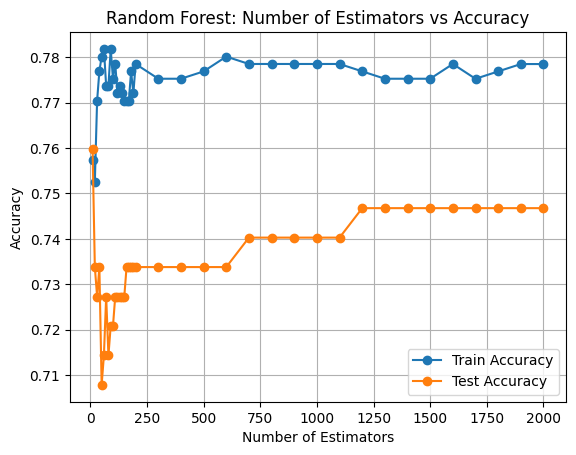

In [ ]:
#same function but we are gonna append another metric to make a training-test accuracy graph
def train_random_forest(X_train, y_train, X_test, y_test, param_grid):
    accuracy_scores = {'train_accuracy': [], 'test_accuracy': []}

    for n_estimators in param_grid['n_estimators']:
        rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42, criterion='gini')     #with gini
        rf_model.fit(X_train, y_train)

        y_pred_train = rf_model.predict(X_train)
        y_pred_test = rf_model.predict(X_test)

        train_accuracy = np.mean(cross_val_score(rf_model, X_train, y_train))
        test_accuracy = accuracy_score(y_test, y_pred_test)

        accuracy_scores['train_accuracy'].append(train_accuracy)
        accuracy_scores['test_accuracy'].append(test_accuracy)

    return accuracy_scores


result = train_random_forest(X_train, y_train, X_test, y_test, param_grid_rf)

plt.plot(param_grid_rf['n_estimators'], result['train_accuracy'], label='Train Accuracy', marker='o')
plt.plot(param_grid_rf['n_estimators'], result['test_accuracy'], label='Test Accuracy', marker='o')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest: Number of Estimators vs Accuracy')
plt.legend()

plt.grid(True)
plt.show()


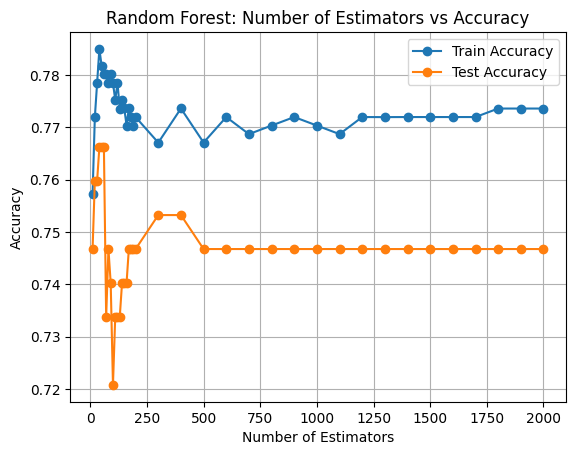

In [ ]:
def train_random_forest(X_train, y_train, X_test, y_test, param_grid):
    accuracy_scores = {'train_accuracy': [], 'test_accuracy': []}

    for n_estimators in param_grid['n_estimators']:
        rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42, criterion='entropy')      #with entropy
        rf_model.fit(X_train, y_train)

        y_pred_train = rf_model.predict(X_train)
        y_pred_test = rf_model.predict(X_test)

        train_accuracy = np.mean(cross_val_score(rf_model, X_train, y_train))
        test_accuracy = accuracy_score(y_test, y_pred_test)

        accuracy_scores['train_accuracy'].append(train_accuracy)
        accuracy_scores['test_accuracy'].append(test_accuracy)

    return accuracy_scores


result = train_random_forest(X_train, y_train, X_test, y_test, param_grid_rf)

plt.plot(param_grid_rf['n_estimators'], result['train_accuracy'], label='Train Accuracy', marker='o')
plt.plot(param_grid_rf['n_estimators'], result['test_accuracy'], label='Test Accuracy', marker='o')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest: Number of Estimators vs Accuracy')
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
#conclusion from plots:in both plots the graphs of both train-test accuracy seem to be unstable until reaching a cetrain point where they 'stabilize'
#therefore we should avoid putting small number of trees(n_estimators) in param grid

In [ ]:
#LAST grid!
param_grid_rfc = {'criterion':['gini','entropy'],
    'n_estimators': list(range(200, 2001, 100))
                  }

In [ ]:
grid_rfc = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rfc, refit=True, cv=5, verbose=3)
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV 1/5] END ..criterion=gini, n_estimators=200;, score=0.789 total time=   0.4s
[CV 2/5] END ..criterion=gini, n_estimators=200;, score=0.813 total time=   0.4s
[CV 3/5] END ..criterion=gini, n_estimators=200;, score=0.740 total time=   0.4s
[CV 4/5] END ..criterion=gini, n_estimators=200;, score=0.756 total time=   0.4s
[CV 5/5] END ..criterion=gini, n_estimators=200;, score=0.795 total time=   0.4s
[CV 1/5] END ..criterion=gini, n_estimators=300;, score=0.780 total time=   0.6s
[CV 2/5] END ..criterion=gini, n_estimators=300;, score=0.805 total time=   0.6s
[CV 3/5] END ..criterion=gini, n_estimators=300;, score=0.740 total time=   0.6s
[CV 4/5] END ..criterion=gini, n_estimators=300;, score=0.756 total time=   0.6s
[CV 5/5] END ..criterion=gini, n_estimators=300;, score=0.795 total time=   0.6s
[CV 1/5] END ..criterion=gini, n_estimators=400;, score=0.772 total time=   0.8s
[CV 2/5] END ..criterion=gini, n_estimators=400

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [200, 300, 400, 500, 600, 700, 800,
                                          900, 1000, 1100, 1200, 1300, 1400,
                                          1500, 1600, 1700, 1800, 1900, 2000]},
             verbose=3)

In [ ]:
grid_rfc.best_params_

{'criterion': 'gini', 'n_estimators': 600}

In [ ]:
top_results_indices = np.argsort(grid_rfc.cv_results_['mean_test_score'])[::-1][:20]   #test_score=mean cross validation score
top_results_params = [grid_rfc.cv_results_['params'][i] for i in top_results_indices]
top_results_scores = [grid_rfc.cv_results_['mean_test_score'][i] for i in top_results_indices]

for params, score in zip(top_results_params, top_results_scores):
    print(f"Params: {params}, Mean Test Score: {score:.4f}")

Params: {'criterion': 'gini', 'n_estimators': 600}, Mean Test Score: 0.7802
Params: {'criterion': 'gini', 'n_estimators': 200}, Mean Test Score: 0.7785
Params: {'criterion': 'gini', 'n_estimators': 700}, Mean Test Score: 0.7785
Params: {'criterion': 'gini', 'n_estimators': 800}, Mean Test Score: 0.7785
Params: {'criterion': 'gini', 'n_estimators': 900}, Mean Test Score: 0.7785
Params: {'criterion': 'gini', 'n_estimators': 1000}, Mean Test Score: 0.7785
Params: {'criterion': 'gini', 'n_estimators': 1100}, Mean Test Score: 0.7785
Params: {'criterion': 'gini', 'n_estimators': 1600}, Mean Test Score: 0.7785
Params: {'criterion': 'gini', 'n_estimators': 1900}, Mean Test Score: 0.7785
Params: {'criterion': 'gini', 'n_estimators': 2000}, Mean Test Score: 0.7785
Params: {'criterion': 'gini', 'n_estimators': 1200}, Mean Test Score: 0.7769
Params: {'criterion': 'gini', 'n_estimators': 1800}, Mean Test Score: 0.7769
Params: {'criterion': 'gini', 'n_estimators': 500}, Mean Test Score: 0.7769
Param

In [ ]:
#best gini: 600, 78%
#best entropy: 400, 77.36%

In [ ]:
#test acccuracy with best gini
grid_rfc.score(X_test,y_test)

0.7337662337662337

In [ ]:
rf_entropy=RandomForestClassifier(n_estimators=400,criterion='entropy',random_state=42)
rf_entropy.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=42)

In [ ]:
np.mean(cross_val_score(RandomForestClassifier(n_estimators=400,criterion='entropy',random_state=42),X_train,y_train))

0.7736238837798214

In [ ]:
np.mean(cross_val_score(rf_entropy,X_train,y_train))

0.7736238837798214

In [ ]:
accuracy_score(y_test,rf_entropy.predict(X_test))   #test accuracy with entropy

0.7532467532467533

In [ ]:
#B= 500,1000,2000

In [ ]:
def rfc_evaluate(X_train,y_train,X_test,y_test):
  accuracy_scores = []
  for criterion in ['gini','entropy']:
    for n_estimator in [500,1000,2000]:

      model=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,random_state=42)
      model.fit(X_train,y_train)

      train_accuracy=np.mean(cross_val_score(model,X_train,y_train))
      test_accuracy=accuracy_score(y_test,model.predict(X_test))

      #accuracy_scores=np.append(accuracy_scores,{'Trees':n_estimator,'criterion':criterion,'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy})
      accuracy_scores.append({'Trees': n_estimator, 'criterion': criterion, 'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy})

  return accuracy_scores


In [ ]:
result=rfc_evaluate(X_train,y_train,X_test,y_test)

In [ ]:
for scores in result:
    print(f"Trees: {scores['Trees']}, Criterion: {scores['criterion']}, Train Accuracy: {scores['train_accuracy']:.4f}, test_accuracy: {scores['test_accuracy']:.4f}")

Trees: 500, Criterion: gini, Train Accuracy: 0.7769, test_accuracy: 0.7338
Trees: 1000, Criterion: gini, Train Accuracy: 0.7785, test_accuracy: 0.7403
Trees: 2000, Criterion: gini, Train Accuracy: 0.7785, test_accuracy: 0.7468
Trees: 500, Criterion: entropy, Train Accuracy: 0.7671, test_accuracy: 0.7468
Trees: 1000, Criterion: entropy, Train Accuracy: 0.7704, test_accuracy: 0.7468
Trees: 2000, Criterion: entropy, Train Accuracy: 0.7736, test_accuracy: 0.7468


In [ ]:
#after 500 trees we gain minimal performance(both in train and test) while the computation cost gets much bigger
#this was more apparent with our previous plots
#it s worth mentioning that the 500 trees ,which was the best value for entropy, was the point at which the test accuracy becomes an horizontal line

In [ ]:
#seems that in general test accuracy is better when entropy criterion is used

In [ ]:
#B=500

In [ ]:
rf_500=RandomForestClassifier(criterion='entropy',n_estimators=500,random_state=42)   #RandomForestClassifier doesn't keep the accuracy score:S
rf_500.fit(X_train,y_train)
y_pred_train=rf_500.predict(X_train)
y_pred_test=rf_500.predict(X_test)

In [ ]:
print(f"CV Train_accuracy: {np.mean(cross_val_score(rf_500,X_train,y_train))}")
print(f"Test_accuracy    : {accuracy_score(y_test,y_pred_test)}")

CV Train_accuracy: 0.7671064907370384
Test_accuracy    : 0.7467532467532467


In [ ]:
confusion_matrix(y_test,y_pred_test)


array([[80, 19],
       [20, 35]])

In [ ]:
rf_500.feature_importances_

array([0.07938802, 0.24147913, 0.09389672, 0.07185556, 0.07518905,
       0.16982989, 0.12258243, 0.1457792 ])

In [ ]:
#After reaching a certain value of n_estimators, the improvement in performance on the training set becomes marginal, and there is no discernible benefit for the test set

#Neural Networks (all variables)

In [ ]:
#pip install keras-tuner

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
#import keras_tuner

In [ ]:
model_16 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_16.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)
history = model_16.fit(X_train, y_train, epochs=300, batch_size=100,validation_split=0.2, verbose=1)

Epoch 1/300
5/5 [==============================] - 1s 63ms/step - loss: 0.7571 - accuracy: 0.3585 - val_loss: 0.6982 - val_accuracy: 0.4146
Epoch 2/300
5/5 [==============================] - 0s 16ms/step - loss: 0.7346 - accuracy: 0.3971 - val_loss: 0.6862 - val_accuracy: 0.4797
Epoch 3/300
5/5 [==============================] - 0s 14ms/step - loss: 0.7151 - accuracy: 0.4623 - val_loss: 0.6759 - val_accuracy: 0.6098
Epoch 4/300
5/5 [==============================] - 0s 14ms/step - loss: 0.6984 - accuracy: 0.5397 - val_loss: 0.6667 - val_accuracy: 0.6667
Epoch 5/300
5/5 [==============================] - 0s 10ms/step - loss: 0.6846 - accuracy: 0.5723 - val_loss: 0.6587 - val_accuracy: 0.6667
Epoch 6/300
5/5 [==============================] - 0s 15ms/step - loss: 0.6706 - accuracy: 0.6090 - val_loss: 0.6509 - val_accuracy: 0.6829
Epoch 7/300
5/5 [==============================] - 0s 10ms/step - loss: 0.6588 - accuracy: 0.6497 - val_loss: 0.6431 - val_accuracy: 0.6911
Epoch 8/300
5/5 [===

In [ ]:
loss, accuracy = model_16.evaluate(X_train, y_train)
print("Training Accuracy:", accuracy)

20/20 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8192
Training Accuracy: 0.8192182183265686


In [ ]:
#model_16.predict(X_test)

In [ ]:
model_16.evaluate(X_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.6410 - accuracy: 0.7208


[0.6409532427787781, 0.7207792401313782]

In [ ]:
y_pred_test = (model_16.predict(X_test) >= 0.5).astype(int)   #verify that model.evaluate~=accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:",  accuracy_score(y_test, y_pred_test))

5/5 [==============================] - 0s 2ms/step
Accuracy: 0.7207792207792207


In [ ]:
#HPO

In [ ]:
learning_rates = [0.001, 0.01]
neurons = [4, 8, 16]

def train_evaluate_mlp(X_train, y_train, X_test, y_test, learning_rates, neurons):
    accuracies = []
    for lr in learning_rates:
        for n in neurons:
            tf.random.set_seed(42)
            model = Sequential()

            model.add(Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
            model.add(Dense(n, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))

            optimizer = Adam(learning_rate=lr)

            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

            history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=300, batch_size=100, verbose=1) #############################

            train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
            test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
            accuracies.append((lr, n, train_accuracy, test_accuracy,history))   #history saved only for the plots,takes more memory hence i should avoid appending it if no plot needed

    return accuracies

In [ ]:
results = train_evaluate_mlp(X_train, y_train, X_test, y_test, learning_rates, neurons)

Epoch 1/300
7/7 [==============================] - 1s 36ms/step - loss: 0.6602 - accuracy: 0.6531 - val_loss: 0.6561 - val_accuracy: 0.6429
Epoch 2/300
7/7 [==============================] - 0s 8ms/step - loss: 0.6554 - accuracy: 0.6531 - val_loss: 0.6523 - val_accuracy: 0.6429
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.6531 - val_loss: 0.6483 - val_accuracy: 0.6429
Epoch 4/300
7/7 [==============================] - 0s 10ms/step - loss: 0.6456 - accuracy: 0.6531 - val_loss: 0.6438 - val_accuracy: 0.6429
Epoch 5/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6404 - accuracy: 0.6531 - val_loss: 0.6392 - val_accuracy: 0.6429
Epoch 6/300
7/7 [==============================] - 0s 9ms/step - loss: 0.6350 - accuracy: 0.6531 - val_loss: 0.6348 - val_accuracy: 0.6429
Epoch 7/300
7/7 [==============================] - 0s 10ms/step - loss: 0.6296 - accuracy: 0.6531 - val_loss: 0.6302 - val_accuracy: 0.6429
Epoch 8/300
7/7 [=======

In [ ]:
print("Learning Rate\tNeurons\tTrain Accuracy\t                Test Accuracy")
for result in results:
    print(f"{result[0]}\t\t{result[1]}\t{result[2]}\t\t{result[3]}")

Learning Rate	Neurons	Train Accuracy	                Test Accuracy
0.001		4	0.8078175783157349		0.7662337422370911
0.001		8	0.8224755525588989		0.7597402334213257
0.001		16	0.8241042494773865		0.7402597665786743
0.01		4	0.8192182183265686		0.7272727489471436
0.01		8	0.8697068691253662		0.7402597665786743
0.01		16	0.9934853315353394		0.6688311696052551


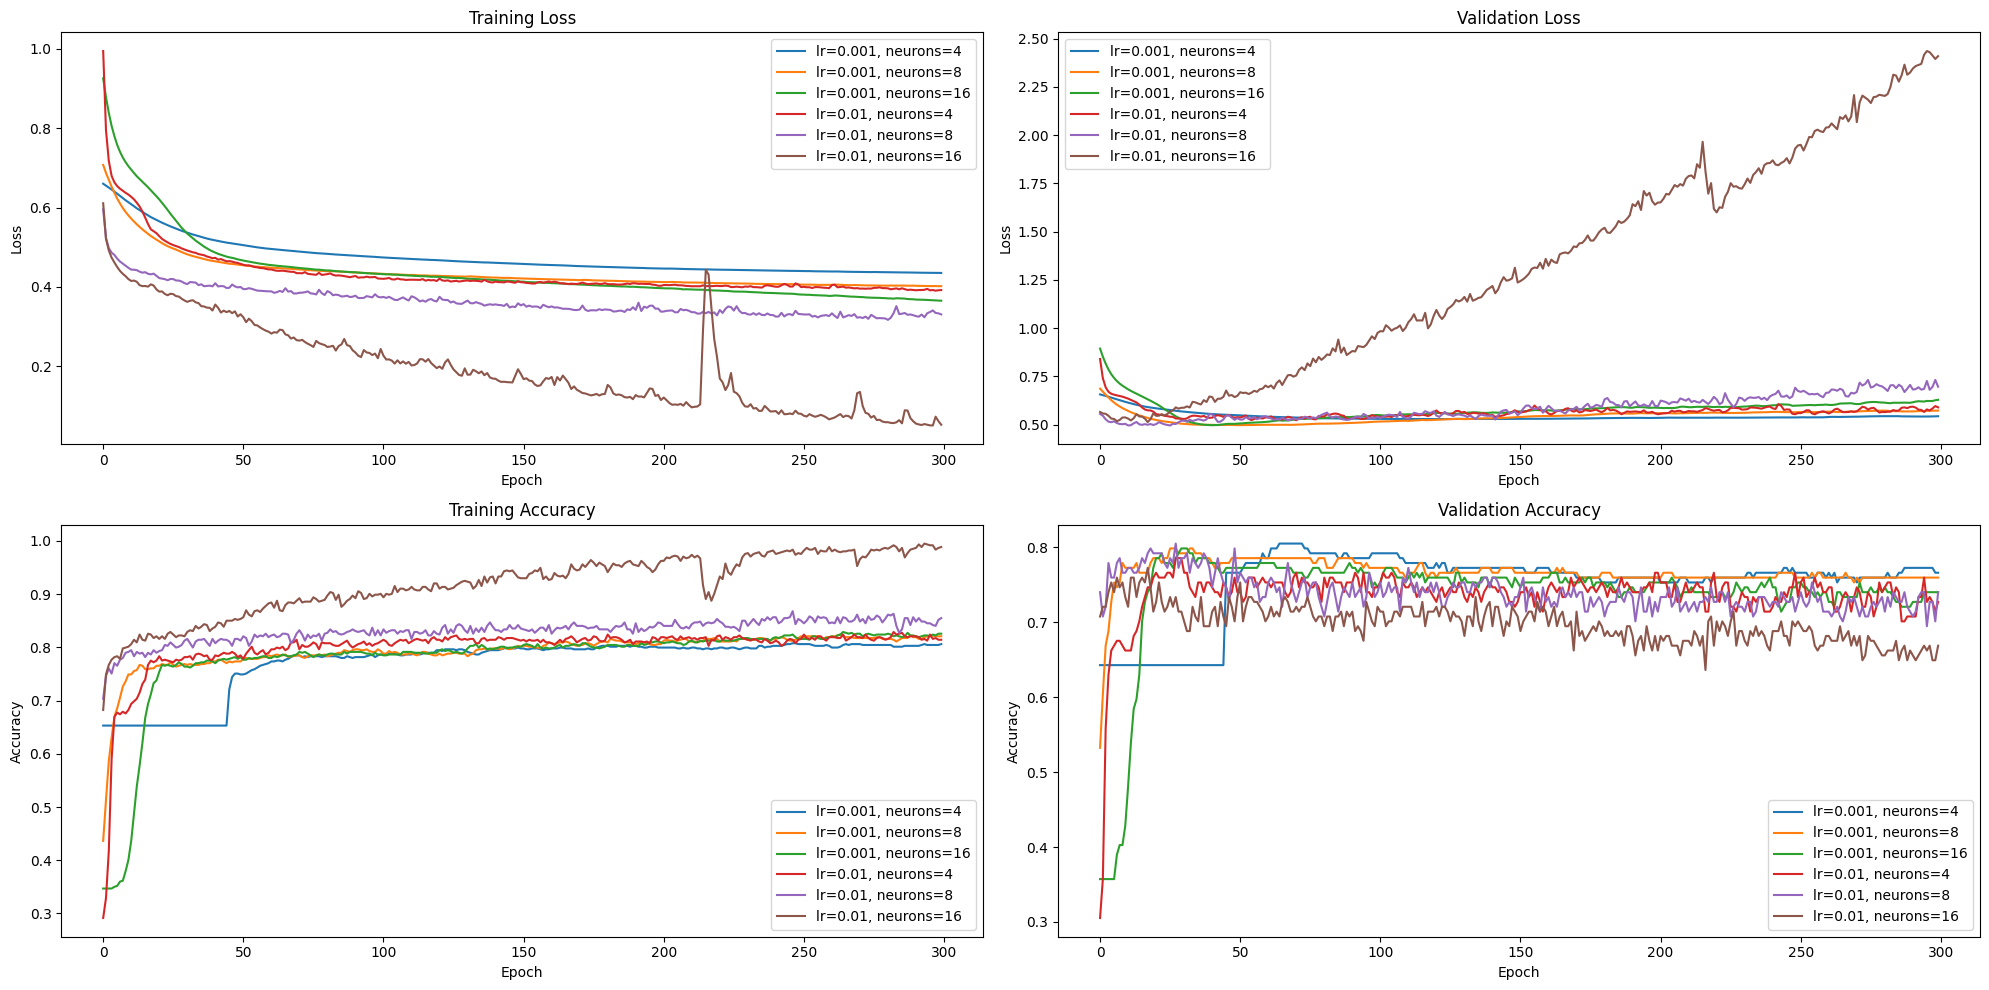

In [ ]:
plt.figure(figsize=(20, 10))
for result in results:
    lr, n, train_accuracy, test_accuracy, history = result
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label=f'lr={lr}, neurons={n}')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(history.history['val_loss'], label=f'lr={lr}, neurons={n}')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(history.history['accuracy'], label=f'lr={lr}, neurons={n}')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(history.history['val_accuracy'], label=f'lr={lr}, neurons={n}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#as the learning rate and number of neurons increase, an overfitting issue becomes apparent

In [ ]:
tf.random.set_seed(42)
model_8=Sequential()
model_8.add(Dense(units=8,activation='relu',input_shape=(X_train.shape[1],)))
model_8.add(Dense(units=8,activation='relu'))
model_8.add(Dense(units=1,activation='sigmoid'))

optimizer=Adam(learning_rate=0.001)
model_8.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
print(model_8.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 72        
                                                                 
 dense_22 (Dense)            (None, 8)                 72        
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
tf.random.set_seed(42)
history=model_8.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300,batch_size=100,verbose=1)

Epoch 1/300
7/7 [==============================] - 1s 36ms/step - loss: 0.7024 - accuracy: 0.5782 - val_loss: 0.6830 - val_accuracy: 0.6039
Epoch 2/300
7/7 [==============================] - 0s 10ms/step - loss: 0.6848 - accuracy: 0.5977 - val_loss: 0.6690 - val_accuracy: 0.6494
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6693 - accuracy: 0.6352 - val_loss: 0.6553 - val_accuracy: 0.6753
Epoch 4/300
7/7 [==============================] - 0s 10ms/step - loss: 0.6543 - accuracy: 0.6678 - val_loss: 0.6422 - val_accuracy: 0.7078
Epoch 5/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6403 - accuracy: 0.6840 - val_loss: 0.6297 - val_accuracy: 0.7208
Epoch 6/300
7/7 [==============================] - 0s 10ms/step - loss: 0.6269 - accuracy: 0.7117 - val_loss: 0.6177 - val_accuracy: 0.7273
Epoch 7/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6142 - accuracy: 0.7134 - val_loss: 0.6066 - val_accuracy: 0.7273
Epoch 8/300
7/7 [======

In [ ]:
model_8.evaluate(X_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.7403


[0.519866406917572, 0.7402597665786743]

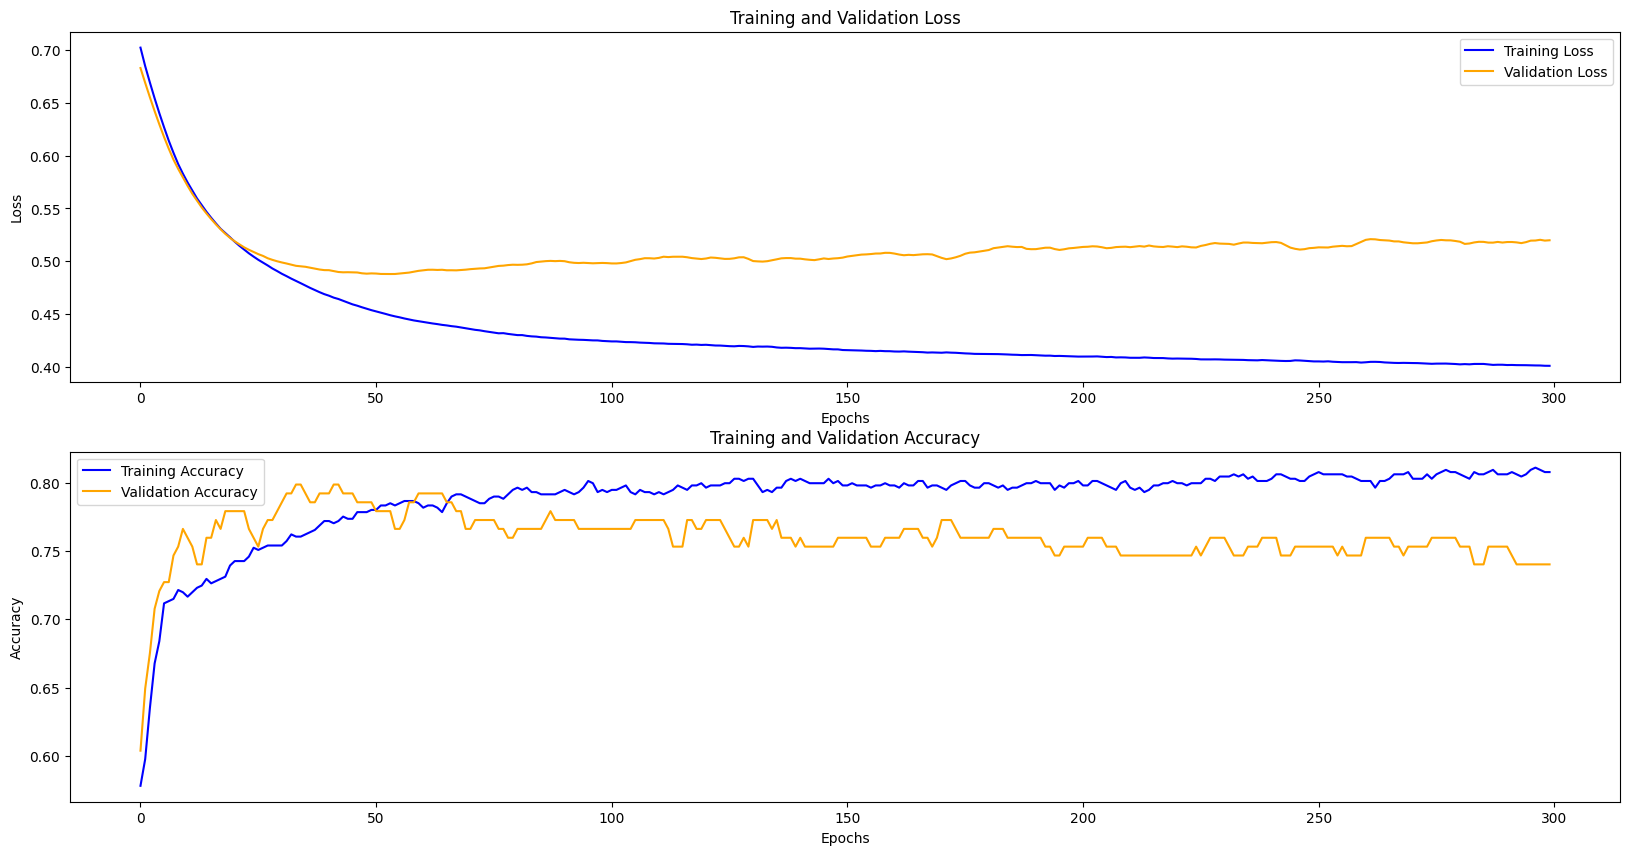

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
#with hidden layers  that don t necessarily got same amount of neurons

#def train_evaluate_mlp(X_train, y_train, X_test, y_test, learning_rates, neurons):
 #   accuracies = []
  #  for lr in learning_rates:
   #     for n1 in neurons:
    #        for n2 in neurons:
     #           tf.random.set_seed(42)
      #          model = tf.keras.Sequential([
       #             tf.keras.layers.Dense(n1, activation='relu', input_shape=(X_train.shape[1],)),
        #            tf.keras.layers.Dense(n2, activation='relu'),
         #           tf.keras.layers.Dense(1, activation='sigmoid')
          #      ])
#
 #               optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  #              model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#
 #               history = model.fit(X_train, y_train, epochs=300, batch_size=100,validation_split=0.2 ,verbose=2)
#
 #               train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
  #              test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
   #             accuracies.append((lr, (n1, n2), train_accuracy, test_accuracy))
#
 #   return accuracies
#results = train_evaluate_mlp(X_train, y_train, X_test, y_test, learning_rates, neurons)
#print("Learning Rate\tNeurons\tTrain Accuracy\t                Test Accuracy")
#for result in results:
 #   print(f"{result[0]}\t\t{result[1]}\t{result[2]}\t\t{result[3]}")

#Glucose and BMI

In [ ]:
X_train=X_train[:,[1,5]]
X_test=X_test[:,[1,5]]

#Random Forest with feature selection

In [ ]:
param_grid_rf = {'criterion':['gini','entropy'],
    'n_estimators': list(range(100, 2001, 100))
                  }

In [ ]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, refit=True, cv=5, verbose=3)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ..criterion=gini, n_estimators=100;, score=0.691 total time=   0.2s
[CV 2/5] END ..criterion=gini, n_estimators=100;, score=0.764 total time=   0.2s
[CV 3/5] END ..criterion=gini, n_estimators=100;, score=0.748 total time=   0.2s
[CV 4/5] END ..criterion=gini, n_estimators=100;, score=0.715 total time=   0.3s
[CV 5/5] END ..criterion=gini, n_estimators=100;, score=0.713 total time=   0.3s
[CV 1/5] END ..criterion=gini, n_estimators=200;, score=0.707 total time=   0.6s
[CV 2/5] END ..criterion=gini, n_estimators=200;, score=0.780 total time=   0.6s
[CV 3/5] END ..criterion=gini, n_estimators=200;, score=0.715 total time=   0.6s
[CV 4/5] END ..criterion=gini, n_estimators=200;, score=0.707 total time=   0.4s
[CV 5/5] END ..criterion=gini, n_estimators=200;, score=0.697 total time=   0.4s
[CV 1/5] END ..criterion=gini, n_estimators=300;, score=0.699 total time=   0.5s
[CV 2/5] END ..criterion=gini, n_estimators=300

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000, 1100, 1200, 1300,
                                          1400, 1500, 1600, 1700, 1800, 1900,
                                          2000]},
             verbose=3)

In [ ]:
grid_rf.best_score_

0.7377982140477143

In [ ]:
grid_rf.best_params_

{'criterion': 'gini', 'n_estimators': 700}

In [ ]:
top_results_indices = np.argsort(grid_rf.cv_results_['mean_test_score'])[::-1][:20]

In [ ]:
top_results_params = [grid_rf.cv_results_['params'][i] for i in top_results_indices]
top_results_scores = [grid_rf.cv_results_['mean_test_score'][i] for i in top_results_indices]

for params, score in zip(top_results_params, top_results_scores):
    print(f"Params: {params}, Mean Test Score: {score:.4f}")

Params: {'criterion': 'gini', 'n_estimators': 700}, Mean Test Score: 0.7378
Params: {'criterion': 'gini', 'n_estimators': 600}, Mean Test Score: 0.7362
Params: {'criterion': 'entropy', 'n_estimators': 600}, Mean Test Score: 0.7362
Params: {'criterion': 'entropy', 'n_estimators': 900}, Mean Test Score: 0.7362
Params: {'criterion': 'entropy', 'n_estimators': 700}, Mean Test Score: 0.7362
Params: {'criterion': 'gini', 'n_estimators': 1400}, Mean Test Score: 0.7362
Params: {'criterion': 'gini', 'n_estimators': 1000}, Mean Test Score: 0.7361
Params: {'criterion': 'entropy', 'n_estimators': 500}, Mean Test Score: 0.7345
Params: {'criterion': 'entropy', 'n_estimators': 800}, Mean Test Score: 0.7345
Params: {'criterion': 'gini', 'n_estimators': 1300}, Mean Test Score: 0.7345
Params: {'criterion': 'gini', 'n_estimators': 800}, Mean Test Score: 0.7345
Params: {'criterion': 'gini', 'n_estimators': 1900}, Mean Test Score: 0.7345
Params: {'criterion': 'entropy', 'n_estimators': 1300}, Mean Test Sco

In [ ]:
accuracy_score(y_test,grid_rf.predict(X_test)) #best gini

0.7467532467532467

In [ ]:
rf_entropy=RandomForestClassifier(n_estimators=600,criterion='entropy',random_state=42) #test accuracy when using entropy criterion and n=600 (600,700 and 900 got almost the same performance therefore we will check the lowest n_estimators)
rf_entropy.fit(X_train,y_train)
accuracy_score(y_test,rf_entropy.predict(X_test))

0.7532467532467533

In [ ]:
#when given less features to train the algorithm seems to require more trees
#entropy still performs better on the test set

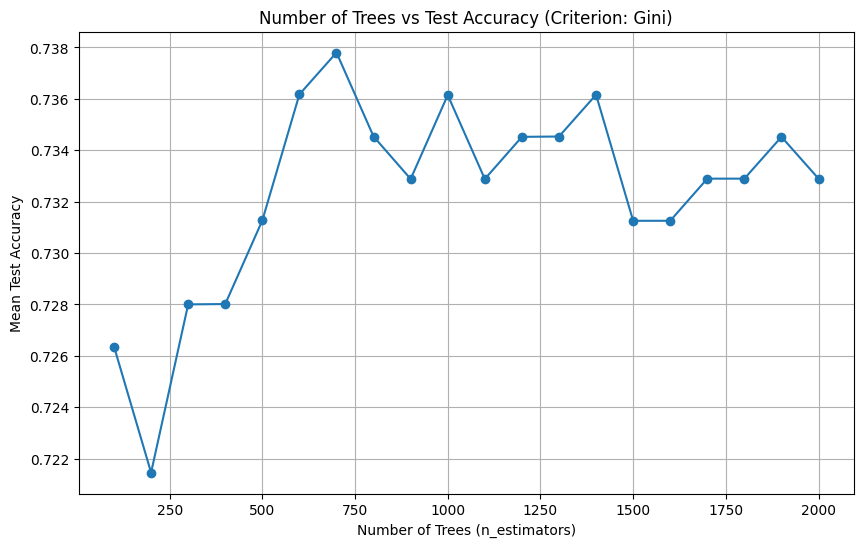

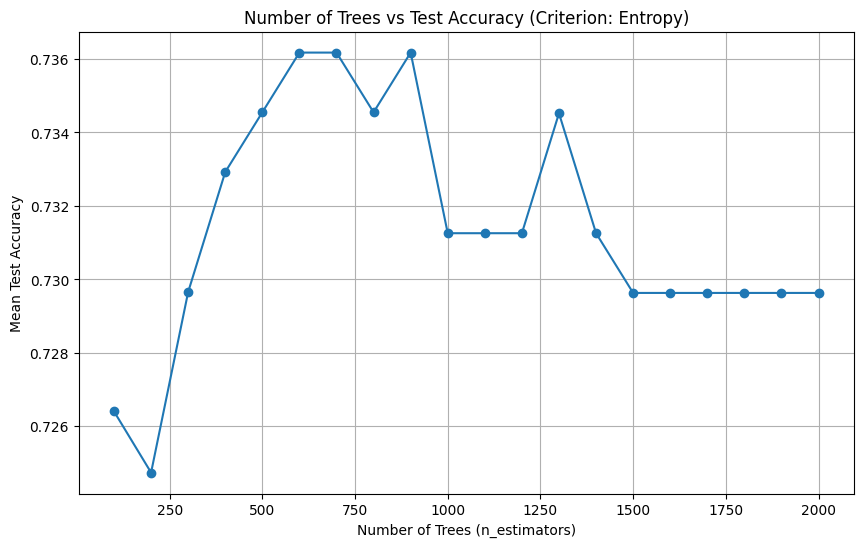

In [ ]:
results = grid_rf.cv_results_

n_estimators = results['param_n_estimators'].data
mean_test_scores = results['mean_test_score']

n_estimators_gini = n_estimators[:int(len(n_estimators)/2)]
mean_test_scores_gini = mean_test_scores[:int(len(mean_test_scores)/2)]

n_estimators_entropy = n_estimators[int(len(n_estimators)/2):]
mean_test_scores_entropy = mean_test_scores[int(len(mean_test_scores)/2):]

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_gini, mean_test_scores_gini, marker='o', linestyle='-')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Test Accuracy')
plt.title('Number of Trees vs Test Accuracy (Criterion: Gini)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_entropy, mean_test_scores_entropy, marker='o', linestyle='-')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Test Accuracy')
plt.title('Number of Trees vs Test Accuracy (Criterion: Entropy)')
plt.grid(True)
plt.show()

In [ ]:
rf_1500=RandomForestClassifier(n_estimators=1500,criterion='entropy',random_state=42)
rf_1500.fit(X_train,y_train)
accuracy_score(y_test,rf_1500.predict(X_test))

0.7402597402597403

In [ ]:
#B=500 ,1000, 2000

In [ ]:
def rfc_evaluate(X_train,y_train,X_test,y_test):
  accuracy_scores = []
  for criterion in ['gini','entropy']:
    for n_estimator in [500,1000,2000]:

      model=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion,random_state=42)
      model.fit(X_train,y_train)

      train_accuracy=np.mean(cross_val_score(model,X_train,y_train))
      test_accuracy=accuracy_score(y_test,model.predict(X_test))

      #accuracy_scores=np.append(accuracy_scores,{'Trees':n_estimator,'criterion':criterion,'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy})
      accuracy_scores.append({'Trees': n_estimator, 'criterion': criterion, 'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy})

  return accuracy_scores



In [ ]:
result=rfc_evaluate(X_train,y_train,X_test,y_test)

In [ ]:
for scores in result:
    print(f"Trees: {scores['Trees']}, Criterion: {scores['criterion']}, Train Accuracy: {scores['train_accuracy']:.4f}, test_accuracy: {scores['test_accuracy']:.4f}")

Trees: 500, Criterion: gini, Train Accuracy: 0.7313, test_accuracy: 0.7403
Trees: 1000, Criterion: gini, Train Accuracy: 0.7361, test_accuracy: 0.7468
Trees: 2000, Criterion: gini, Train Accuracy: 0.7329, test_accuracy: 0.7468
Trees: 500, Criterion: entropy, Train Accuracy: 0.7345, test_accuracy: 0.7532
Trees: 1000, Criterion: entropy, Train Accuracy: 0.7313, test_accuracy: 0.7468
Trees: 2000, Criterion: entropy, Train Accuracy: 0.7296, test_accuracy: 0.7403


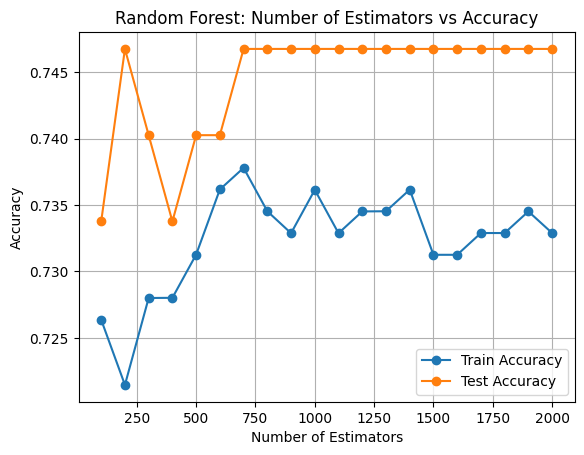

In [ ]:
def train_random_forest(X_train, y_train, X_test, y_test, param_grid):
    accuracy_scores = {'train_accuracy': [], 'test_accuracy': []}

    for n_estimators in param_grid['n_estimators']:
        rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42, criterion='gini')     #with gini
        rf_model.fit(X_train, y_train)

        y_pred_train = rf_model.predict(X_train)
        y_pred_test = rf_model.predict(X_test)

        train_accuracy = np.mean(cross_val_score(rf_model, X_train, y_train))
        test_accuracy = accuracy_score(y_test, y_pred_test)

        accuracy_scores['train_accuracy'].append(train_accuracy)
        accuracy_scores['test_accuracy'].append(test_accuracy)

    return accuracy_scores


result = train_random_forest(X_train, y_train, X_test, y_test, param_grid_rf)

plt.plot(param_grid_rf['n_estimators'], result['train_accuracy'], label='Train Accuracy', marker='o')
plt.plot(param_grid_rf['n_estimators'], result['test_accuracy'], label='Test Accuracy', marker='o')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest: Number of Estimators vs Accuracy')
plt.legend()

plt.grid(True)
plt.show()

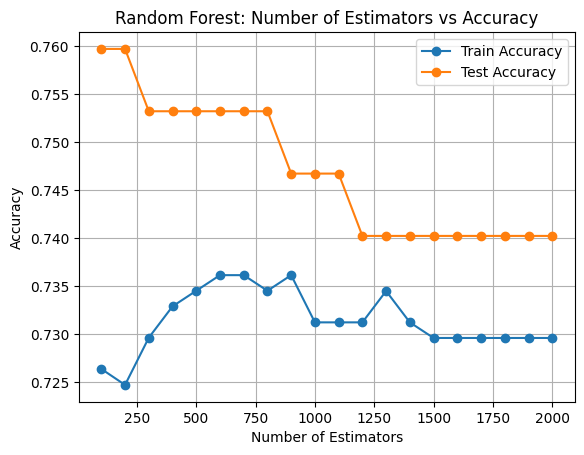

In [ ]:
def train_random_forest(X_train, y_train, X_test, y_test, param_grid):
    accuracy_scores = {'train_accuracy': [], 'test_accuracy': []}

    for n_estimators in param_grid['n_estimators']:
        rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42, criterion='entropy')     #with entropy
        rf_model.fit(X_train, y_train)

        y_pred_train = rf_model.predict(X_train)
        y_pred_test = rf_model.predict(X_test)

        train_accuracy = np.mean(cross_val_score(rf_model, X_train, y_train))
        test_accuracy = accuracy_score(y_test, y_pred_test)

        accuracy_scores['train_accuracy'].append(train_accuracy)
        accuracy_scores['test_accuracy'].append(test_accuracy)

    return accuracy_scores


result = train_random_forest(X_train, y_train, X_test, y_test, param_grid_rf)

plt.plot(param_grid_rf['n_estimators'], result['train_accuracy'], label='Train Accuracy', marker='o')
plt.plot(param_grid_rf['n_estimators'], result['test_accuracy'], label='Test Accuracy', marker='o')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest: Number of Estimators vs Accuracy')
plt.legend()

plt.grid(True)
plt.show()

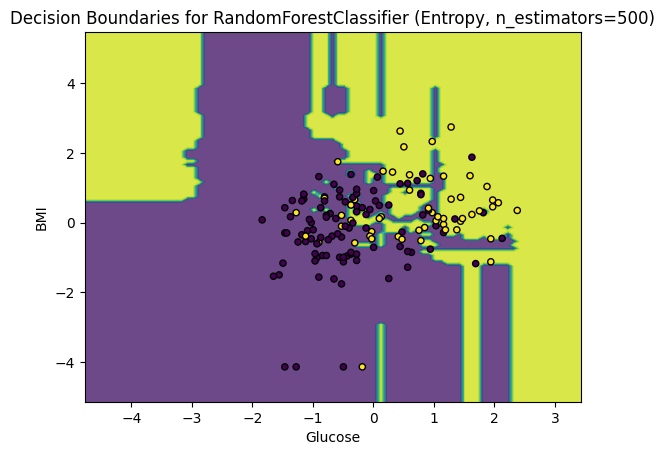

Test Accuracy: 0.7532467532467533


In [ ]:
#2d decision bounds
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Train RandomForestClassifier with entropy criterion and n_estimators=600
rf_entropy = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=42)
rf_entropy.fit(X_train, y_train)

# Predict class labels for each point in the meshgrid
Z = rf_entropy.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolors='k')  # Plot test data
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Decision Boundaries for RandomForestClassifier (Entropy, n_estimators=500)')
plt.show()

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, rf_entropy.predict(X_test))
print("Test Accuracy:", test_accuracy)

#MLP (Glucose and BMI)

In [ ]:
learning_rates = [0.001, 0.01]
neurons = [4, 8, 16]

def train_evaluate_mlp(X_train, y_train, X_test, y_test, learning_rates, neurons):
    accuracies = []
    for lr in learning_rates:
        for n in neurons:
            tf.random.set_seed(42)
            model = Sequential()

            model.add(Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
            model.add(Dense(n, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))

            optimizer = Adam(learning_rate=lr)

            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

            history = model.fit(X_train, y_train, epochs=300, batch_size=100, validation_data=(X_test,y_test), verbose=1)

            train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
            test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
            accuracies.append((lr, n, train_accuracy, test_accuracy,history))   #history saved only for the plots,takes more memory hence i should avoid appending it when no plot is needed

    return accuracies

In [ ]:
results = train_evaluate_mlp(X_train, y_train, X_test, y_test, learning_rates, neurons)

Epoch 1/300
7/7 [==============================] - 1s 39ms/step - loss: 0.5975 - accuracy: 0.6531 - val_loss: 0.6158 - val_accuracy: 0.6429
Epoch 2/300
7/7 [==============================] - 0s 8ms/step - loss: 0.5929 - accuracy: 0.6531 - val_loss: 0.6127 - val_accuracy: 0.6429
Epoch 3/300
7/7 [==============================] - 0s 11ms/step - loss: 0.5887 - accuracy: 0.6531 - val_loss: 0.6097 - val_accuracy: 0.6429
Epoch 4/300
7/7 [==============================] - 0s 8ms/step - loss: 0.5849 - accuracy: 0.6531 - val_loss: 0.6069 - val_accuracy: 0.6429
Epoch 5/300
7/7 [==============================] - 0s 9ms/step - loss: 0.5808 - accuracy: 0.6531 - val_loss: 0.6043 - val_accuracy: 0.6429
Epoch 6/300
7/7 [==============================] - 0s 11ms/step - loss: 0.5771 - accuracy: 0.6531 - val_loss: 0.6018 - val_accuracy: 0.6429
Epoch 7/300
7/7 [==============================] - 0s 11ms/step - loss: 0.5738 - accuracy: 0.6531 - val_loss: 0.5996 - val_accuracy: 0.6429
Epoch 8/300
7/7 [======

In [ ]:
print("Learning Rate\tNeurons\tTrain Accuracy\t                Test Accuracy")
for result in results:
    print(f"{result[0]}\t\t{result[1]}\t{result[2]}\t\t{result[3]}")

Learning Rate	Neurons	Train Accuracy	                Test Accuracy
0.001		4	0.7654722929000854		0.7857142686843872
0.001		8	0.7719869613647461		0.7792207598686218
0.001		16	0.767100989818573		0.7792207598686218
0.01		4	0.7703583240509033		0.7792207598686218
0.01		8	0.776872992515564		0.7727272510528564
0.01		16	0.7866449356079102		0.7467532753944397


In [ ]:
#with less features big loss of performance on training set yet decent boost on test(around 2%)

In [ ]:
#conclusion: model with 2 features better than full model??

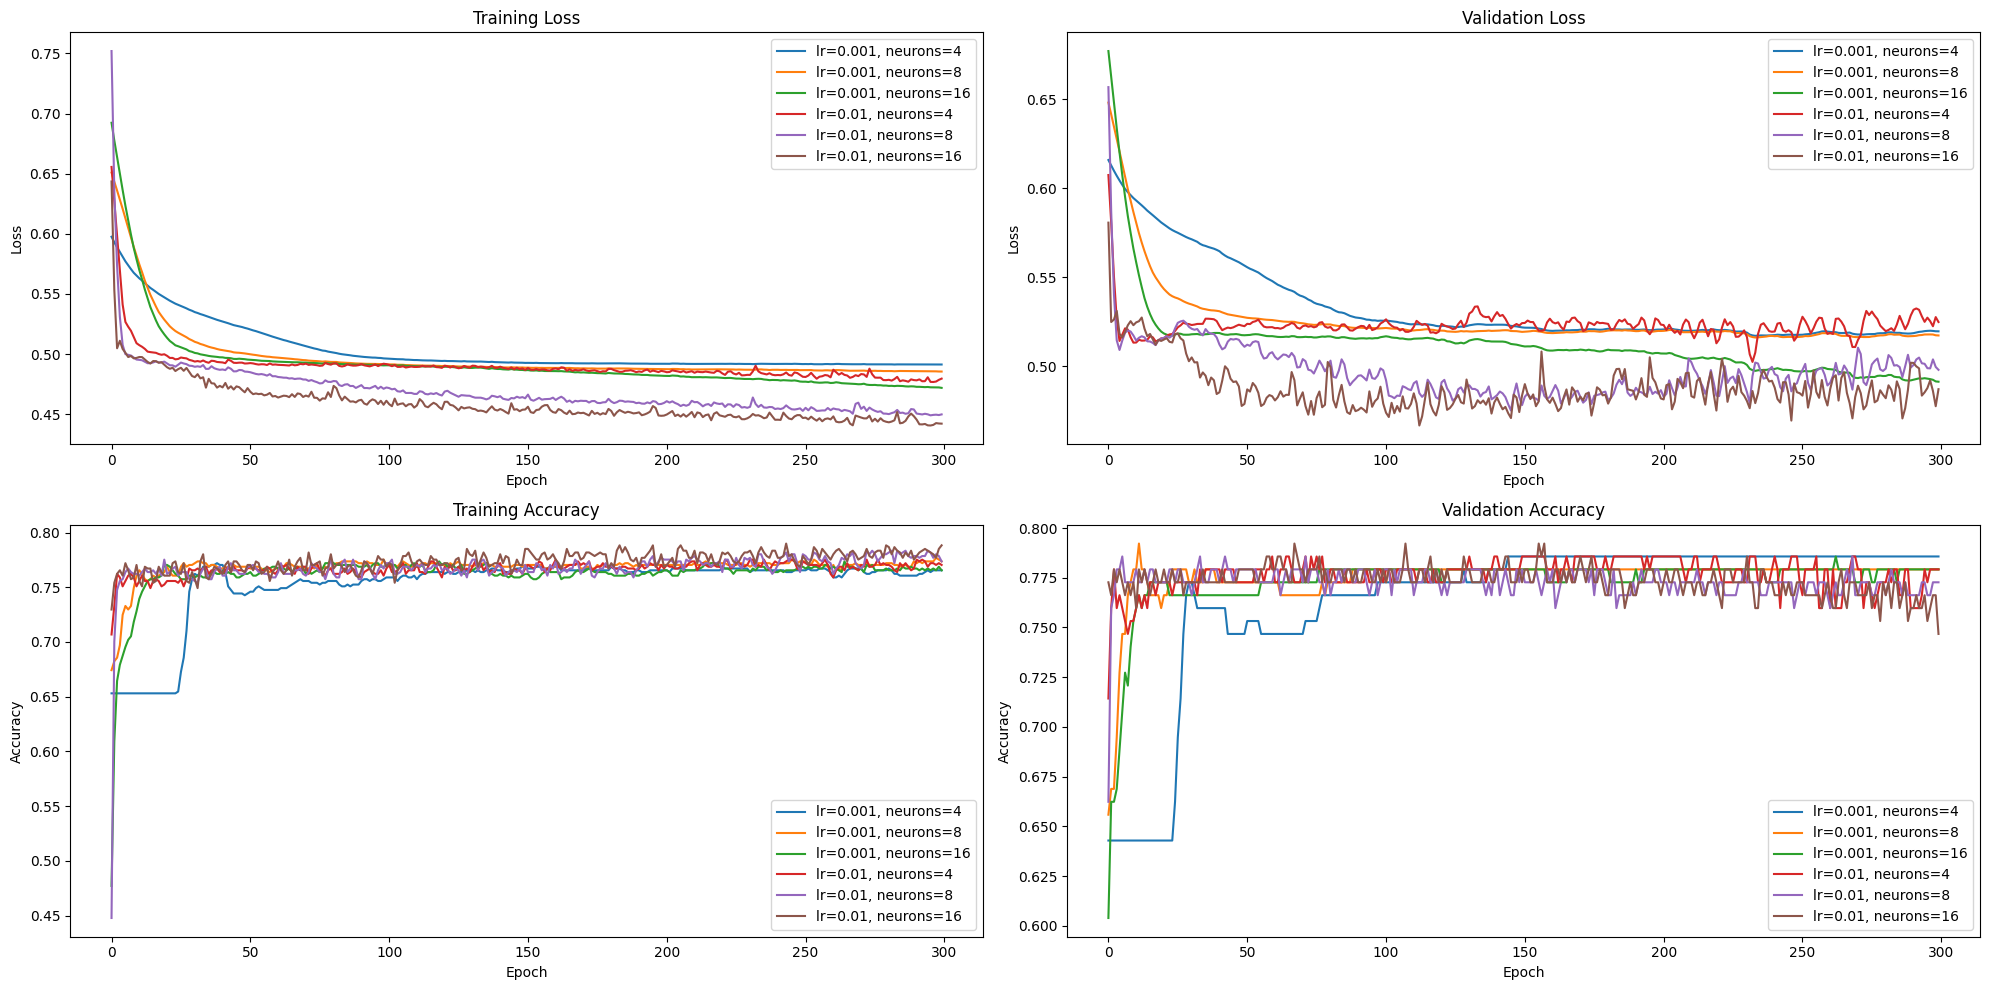

In [ ]:
plt.figure(figsize=(20, 10))
for result in results:
    lr, n, train_accuracy, test_accuracy, history = result
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label=f'lr={lr}, neurons={n}')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(history.history['val_loss'], label=f'lr={lr}, neurons={n}')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(history.history['accuracy'], label=f'lr={lr}, neurons={n}')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(history.history['val_accuracy'], label=f'lr={lr}, neurons={n}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()